In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
p1o1 = int(input("Потребление 1 отрасли 1: "))
p1o2 = int(input("Потребление 1 отрасли 2: "))
p2o1 = int(input("Потребление 2 отрасли 1: "))
p2o2 = int(input("Потребление 2 отрасли 2: "))
kpy1 = int(input("Конечное потребление y1: "))
kpy2 = int(input("Конечное потребление y2: "))
opx1 = int(input("Объем производства x1: "))
opx2 = int(input("Объем производства x2: "))

In [18]:
X = np.matrix([[p1o1, p1o2], [p2o1, p2o2]])
y = np.array([kpy1, kpy2])
x = np.array([opx1, opx2])
y2 = np.array(np.random.randint(50, high=300, size=2))

In [19]:
E = np.eye(len(X))
# print("Единичная матрица: \n", E)

A = np.zeros((2, 2))
A[0, 0] = X[0, 0] / x[0]
A[1, 0] = X[1, 0] / x[0]
A[0, 1] = X[0, 1] / x[1]
A[1, 1] = X[1, 1] / x[1]
print("Матрица прямых затрат: \n", A)

Матрица прямых затрат: 
 [[0.07801418 0.17964072]
 [0.12056738 0.11976048]]


In [20]:
EA = E - A
# print("", EA)

S = np.linalg.inv(EA)
print("матрицы полных затрат: \n", S)

матрицы полных затрат: 
 [[1.11435484 0.22741935]
 [0.15263441 1.1672043 ]]


In [21]:
E1 = S @ EA
print("", E1)

if np.all(S > 0):
    print("Матрица A продуктивна")

 [[ 1.00000000e+00  1.42246655e-17]
 [-5.13101386e-18  1.00000000e+00]]
Матрица A продуктивна


In [22]:
np.linalg.eig(A)

d = np.linalg.eigvals(A)
print("Собственные значения матрицы: ", d)

Собственные значения матрицы:  [-0.04975485  0.24752951]


In [23]:
lambda_A = np.max(d)
print("Определение числа Фробениуса: ", lambda_A)

Определение числа Фробениуса:  0.2475295138840824


In [24]:
P = np.linalg.eig(A)[1]
print("Собств. векторы A, стоящие в столбцах матр. P\n", P)

Собств. векторы A, стоящие в столбцах матр. P
 [[-0.81490278 -0.72730684]
 [ 0.57959767 -0.68631243]]


In [25]:
x1 = S @ y
print("Вектор объемов производства по отраслям (x1=x)", x1)

Вектор объемов производства по отраслям (x1=x) [141. 167.]


In [26]:
x2 = S @ y2
print("Вектор новых объемов производства по отраслям,→ (валового выпуска)", x2)

Вектор новых объемов производства по отраслям,→ (валового выпуска) [378.56225806 361.99494624]


In [27]:
xc = np.array([0., 0.])
x11 = A[0, 0] * x2[0]
x21 = A[1, 0] * x2[0]
xc[0] = x2[0] - (x11 + x21)
x12 = A[0, 1] * x2[1]
x22 = A[1, 1] * x2[1]
xc[1] = x2[1] - (x12 + x22)
print("вектор чистой продукции отраслей xc: ", xc)

вектор чистой продукции отраслей xc:  [303.38677419 253.61322581]


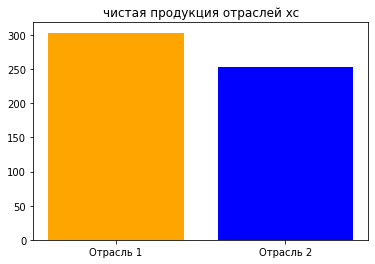

In [28]:
names = ["Отрасль 1", "Отрасль 2"]
plt.bar(names, xc, color=["orange", "blue"])
plt.title("чистая продукция отраслей xc")
plt.show()

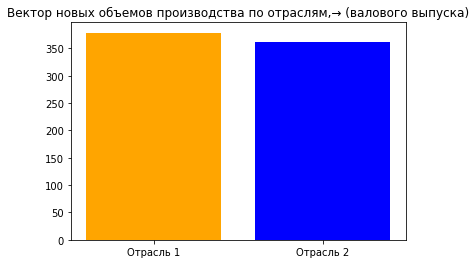

In [29]:
plt.bar(names, x2, color=["orange", "blue"])
plt.title("Вектор новых объемов производства по отраслям,→ (валового выпуска)")
plt.show()

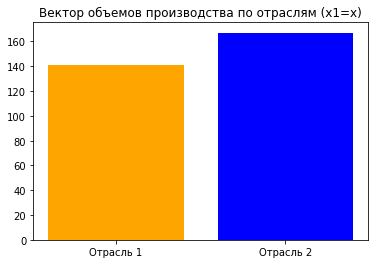

In [30]:
plt.bar(names, x1, color=["orange", "blue"])
plt.title("Вектор объемов производства по отраслям (x1=x)")
plt.show()